In [1]:
'Import Python Libraries'
import numpy as np
from numpy.matlib import repmat
from spectral.io import envi
import os
from scipy.stats import dirichlet
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy.ndimage.filters import convolve1d
from scipy.signal import medfilt

from generalUtilities import generalUtilities
from hsiUtilities import hsiUtilities

In [2]:
endMemLib='/Volume2/arunFiles/python_HSITools/crismBalancingDatasets/dataProducts/mica_CRendmembers_reduced.sli'
endMemHdr = endMemLib.replace('.sli', '.sli.hdr')

In [3]:
'get the wavelength from the header'
hdr = envi.read_envi_header(endMemHdr)
if 'wavelength' in hdr:
    try:
        wavelength = [float(b) for b in hdr['wavelength']]
    except:
        pass

In [13]:
'Read the SLI files'
micaSLI = envi.open(endMemHdr, endMemLib)
mica_data = micaSLI.spectra
comica_data = np.zeros((mica_data.shape))
'Apply the continuum removal'
for ii in range(mica_data.shape[0]):
    temp = np.vstack((wavelength, np.squeeze(mica_data[ii, :])))
    comica_data[ii, :] = generalUtilities().convex_hull(temp.T)

'Ratio to get the continuum removed'
crmica_data = mica_data / comica_data
mica_data = hsiUtilities().scaleSpectra(mica_data, scaleMin=1)

In [14]:
'Apply spectral smoothing'
micaSm_data = np.zeros((crmica_data.shape))
b = np.array([1.,1.,1.,1.,1.])
for ii in range(20):
    #crmicaSm_data[ii, :] = convolve1d(np.squeeze(crmica_data[ii, :]), b/b.sum())
    micaSm_data[ii, :] = medfilt(np.squeeze(mica_data[ii, :]), kernel_size=[5])

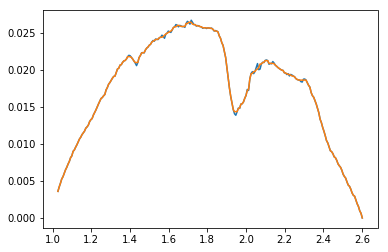

In [22]:
idx= 7
fig1 = plt.figure()
plt.plot(wavelength, mica_data[idx,:])
plt.plot(wavelength, micaSm_data[idx, :])